In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.shape

(400, 9)

In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df = df.drop("Serial No.", axis = 1)

In [12]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [28]:
df = df.rename(columns = {"GRE Score" : "gre", "TOEFL Score" : "toefl", "University Rating" : "ranking", 
                          "SOP" : "sop", "LOR " : "lor", "CGPA" : "cgpa", "Research" : "research",
                          "Chance of Admit " : "chance"
                         })

In [29]:
df.head(2)

,gre,toefl,ranking,sop,lor,cgpa,research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


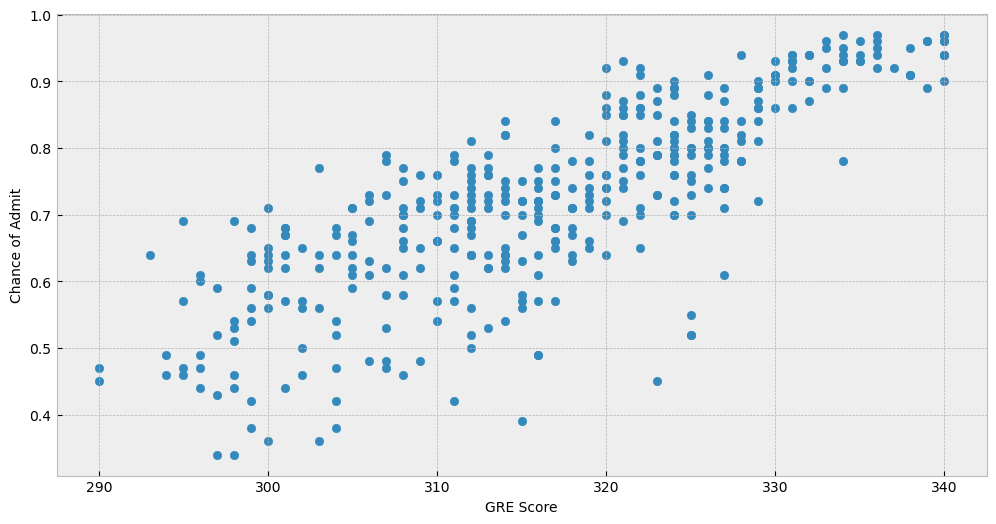

In [25]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.scatter('gre', "chance", data=df)
plt.xlabel("GRE Score", fontsize=10)
plt.ylabel('Chance of Admit', fontsize=10)
# plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

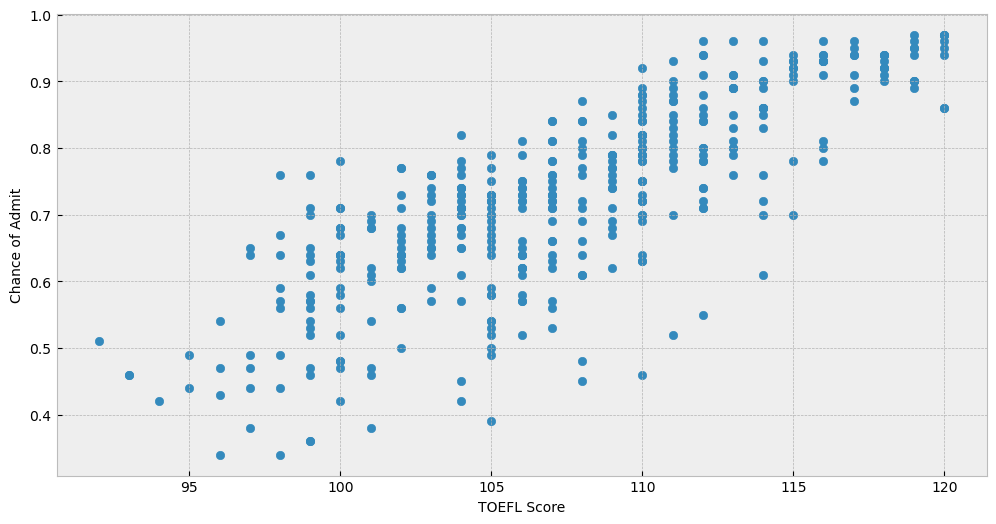

In [31]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.scatter('toefl', "chance", data=df)
plt.xlabel("TOEFL Score", fontsize=10)
plt.ylabel('Chance of Admit', fontsize=10)
# plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

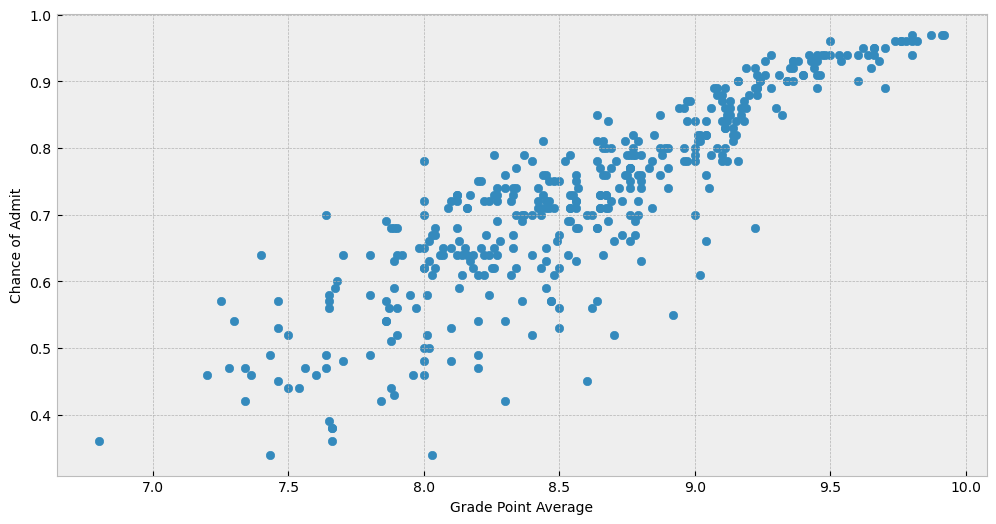

In [33]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.scatter('cgpa', "chance", data=df)
plt.xlabel("Grade Point Average", fontsize=10)
plt.ylabel('Chance of Admit', fontsize=10)
# plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

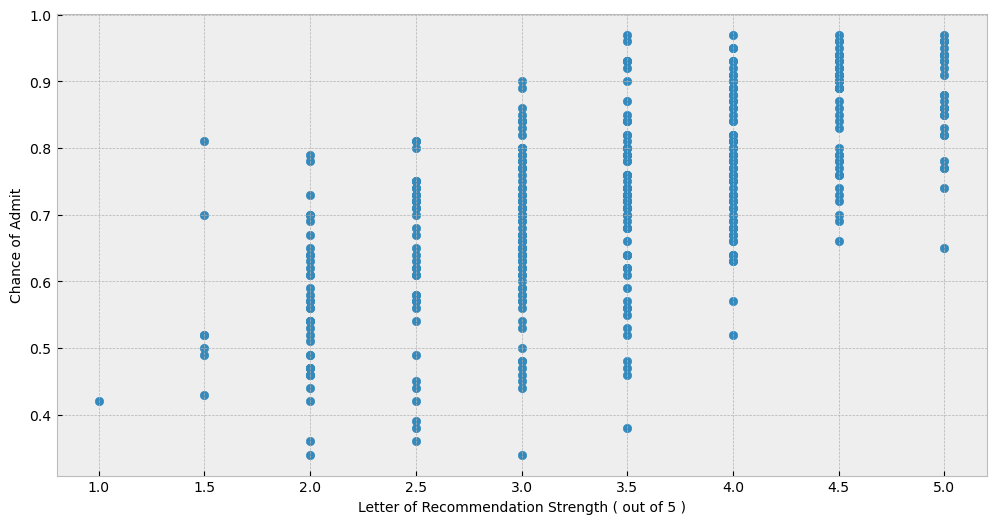

In [36]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.scatter('lor', "chance", data=df)
plt.xlabel("Letter of Recommendation Strength ( out of 5 )", fontsize=10)
plt.ylabel('Chance of Admit', fontsize=10)
# plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

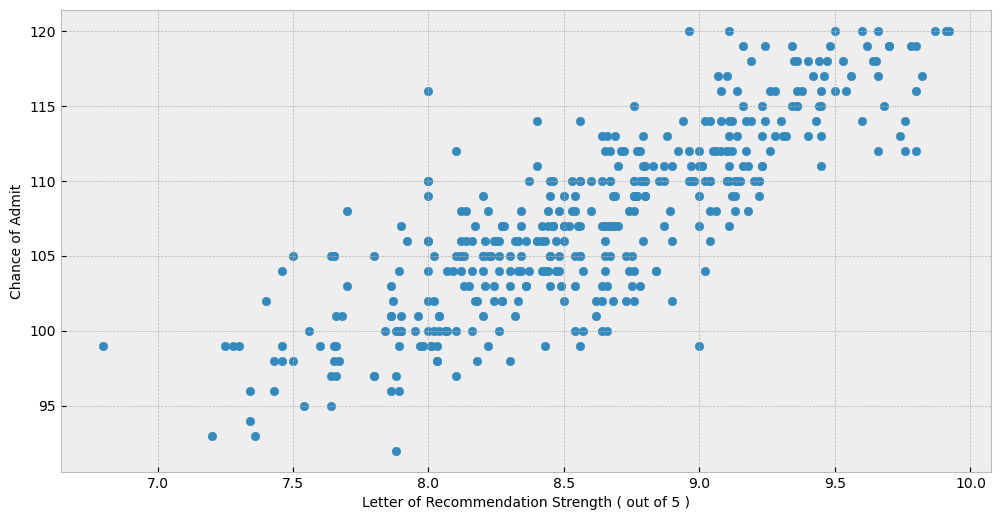

In [38]:
plt.figure(figsize = (12, 6))
plt.style.use("bmh")
plt.scatter('cgpa', "toefl", data=df)
plt.xlabel("Letter of Recommendation Strength ( out of 5 )", fontsize=10)
plt.ylabel('Chance of Admit', fontsize=10)
# plt.title('Rooms/Price correlation', loc='Center', fontsize=14)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
reg = LinearRegression()

In [43]:
X = df.drop("chance", axis = 1)
y = df["chance"]

In [45]:
X.head(1)

,gre,toefl,ranking,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1


In [46]:
y.head(1)

0    0.92
Name: chance, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [47]:
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
reg.coef_

array([0.00200211, 0.00287671, 0.00554717, 0.00064138, 0.01513117,
       0.11630121, 0.01603103])

In [50]:
pred = reg.predict(X_test)

In [51]:
pred[:1]

array([0.64564452])

In [52]:
X_test[:1]

,gre,toefl,ranking,sop,lor,cgpa,research
209,301,104,3,3.5,4.0,8.12,1


In [53]:
reg.score(X_test, y_test)

0.8044753910534401